In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [41]:
df=pd.read_csv("twitterdata.csv",encoding='latin-1').drop(["Unnamed: 0"], axis = 1)

In [42]:
df.head(5)

,Score,Sentiment
0,4,Nice day
1,4,Yea bt u love me!!
2,0,Where's a Windows machine when you need one
3,4,@BarelyKnit aite cul take care
4,0,@PerezHilton damn you for posting this so last...


In [4]:
df.shape

(16000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Score      16000 non-null  int64 
 1   Sentiment  16000 non-null  object
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [6]:
df['Score'] = df['Score'].replace([4],"Positive")
df['Score'] = df['Score'].replace([0],"Negative")

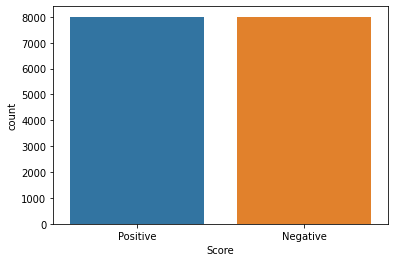

In [7]:
sns.countplot(x = 'Score', data = df)

In [8]:
df.head()

,Score,Sentiment
0,Positive,Nice day
1,Positive,Yea bt u love me!!
2,Negative,Where's a Windows machine when you need one
3,Positive,@BarelyKnit aite cul take care
4,Negative,@PerezHilton damn you for posting this so last...


In [9]:
df.describe()

,Score,Sentiment
count,16000,16000
unique,2,15983
top,Negative,My friends made me join twitter.. so here i am...
freq,8007,3


In [10]:
print(df.isnull().sum())

Score        0
Sentiment    0
dtype: int64


In [11]:
df["Score"].unique()

array(['Positive', 'Negative'], dtype=object)

In [12]:
positive_sentiments = ' '.join(df[df['Score'] == "Positive"]['Sentiment'].str.lower())
negative_sentiments = ' '.join(df[df['Score'] == "Negative"]['Sentiment'].str.lower())

Text(0.5, 1.0, 'Positive tweets Wordcloud')

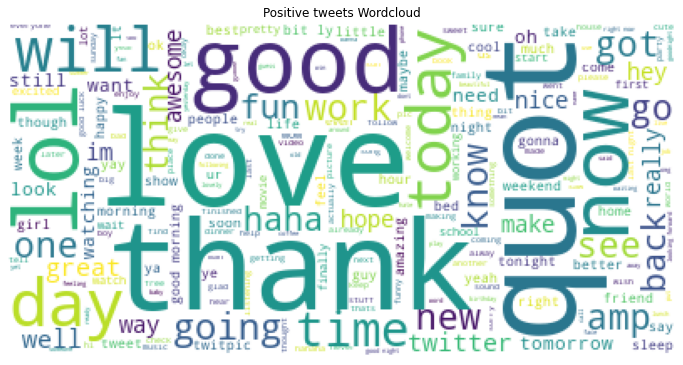

In [13]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_sentiments)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

Text(0.5, 1.0, 'Negative tweets Wordcloud')

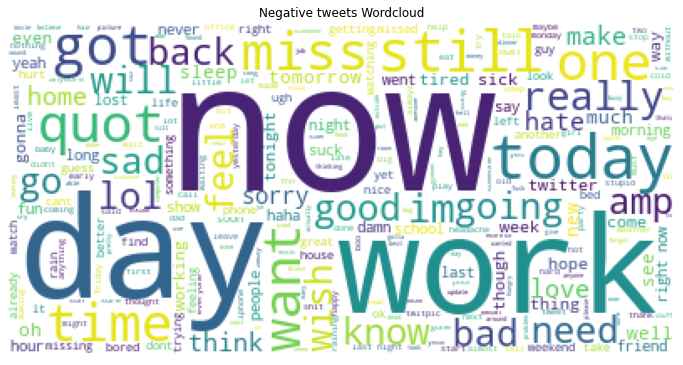

In [14]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_sentiments)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

In [15]:
x=df.iloc[:,-1].values
y=df.iloc[:,0].values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import  MultinomialNB

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [18]:
test_model=Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])

In [19]:
test_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [20]:
y_pred = test_model.predict(X_test)
y_pred

array(['Negative', 'Positive', 'Negative', ..., 'Positive', 'Negative',
       'Positive'], dtype='<U8')

In [21]:
y_test

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
accuracy_score(y_pred,y_test)*100

73.9375

In [24]:
confusion_matrix(y_pred,y_test)

array([[1976,  836],
       [ 415, 1573]])

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.83      0.70      0.76      2812
    Positive       0.65      0.79      0.72      1988

    accuracy                           0.74      4800
   macro avg       0.74      0.75      0.74      4800
weighted avg       0.75      0.74      0.74      4800



In [26]:
!pip install streamlit
!pip install pyngrok

In [33]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import  MultinomialNB

def user_input():
  Review = st.text_input("enter your review")
  data={"Sentiment": Review}
  features= pd.DataFrame(data,index=[0])
  return features

st.title("ML Major Project Deployment")
st.subheader("SENTIMENT ANALYSIS OF REVIEWS")
dframe = user_input()
#st.write(dframe)

df=pd.read_csv("twitterdata.csv",encoding='latin-1').drop(["Unnamed: 0"], axis = 1)
df['Score'] = df['Score'].replace([4],"Positive")
df['Score'] = df['Score'].replace([0],"Negative")




x =df.iloc[:,-1].values
y =df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)


test_model=Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])
test_model.fit(X_train, y_train)

y_pred = test_model.predict(dframe)

st.write(y_pred)

Overwriting app.py


In [34]:
from pyngrok import ngrok
ngrok.connect(port='8501')

'http://af21ca88a408.ngrok.io'

In [ ]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.196.112.211:8501

